In [3]:
from statsmodels.tsa.statespace.structural import UnobservedComponents
import statsmodels.api as sm
import numpy as np 
import pandas as pd
import plotly.express as px

nsample = 200

data = sm.datasets.macrodata.load_pandas().data
data.index = pd.date_range(start = '1959', freq='Q', periods=len(data))
data = data.drop(columns = ['year', 'quarter'])
data = data[['realgdp', 'realcons']]
data

,realgdp,realcons
1959-03-31,2710.349,1707.4
1959-06-30,2778.801,1733.7
1959-09-30,2775.488,1751.8
1959-12-31,2785.204,1753.7
1960-03-31,2847.699,1770.5
...,...,...
2008-09-30,13324.600,9267.7
2008-12-31,13141.920,9195.3
2009-03-31,12925.410,9209.2
2009-06-30,12901.504,9189.0


In [26]:
fig = px.line(data)
fig.update_layout(title='Macrodata',
                   xaxis_title='Quarter',
                   yaxis_title='USD');
fig.show()

In [89]:
trend = [0]*nsample
for i in range(1,nsample):
    trend[i] = trend[i-1] + np.random.normal(0, 1)


level = [0]*nsample

for i in range(1,nsample):
    level[i] = level[i-1] + trend[i-1] + np.random.normal(0,1)

fig = px.line(level)
fig.update_layout(title='General model',
                   xaxis_title='Time',
                   yaxis_title='Value')
fig.show()

In [4]:
# Константа

level = [5]*nsample

for i in range(1,nsample):
    level[i] = level[i-1] + np.random.normal(0,0)

px.line(level)

In [5]:
# Локальный уровень (Random Walk)


level = [0]*nsample

for i in range(1,nsample):
    level[i] = level[i-1]  + np.random.normal(0,1)
    
px.line(level)


In [6]:
# Детерминированный тренд

trend = [1]*nsample
for i in range(1,nsample):
    trend[i] = trend[i-1] + np.random.normal(0, 0)

level = [100]*nsample

for i in range(1,nsample):
    level[i] = level[i-1] + trend[i-1] + np.random.normal(0,0)

fig = px.line(level)
fig.update_layout(title='General model',
                   xaxis_title='Time',
                   yaxis_title='Value')
fig.show()

In [7]:
# Local level with deterministic trend

trend = [1]*nsample
for i in range(1,nsample):
    trend[i] = trend[i-1] + np.random.normal(0, 0)

level = [100]*nsample

for i in range(1,nsample):
    level[i] = level[i-1] + trend[i-1] + np.random.normal(0,4)

fig = px.line(level)
fig.update_layout(title='RWD',
                   xaxis_title='Time',
                   yaxis_title='Value')
fig.show()

In [16]:
# Локальный линейный тренд
trend = [1]*nsample
for i in range(1,nsample):
    trend[i] = trend[i-1] + np.random.normal(0, 1)

level = [100]*nsample

for i in range(1,nsample):
    level[i] = level[i-1] + trend[i-1] + np.random.normal(0,1)

fig = px.line(level)
fig.update_layout(title='Local linear Trend',
                   xaxis_title='Time',
                   yaxis_title='Value')
fig.show()

In [27]:
# Integrated RW (Smoothed trend)

trend = [1]*nsample
for i in range(1,nsample):
    trend[i] = trend[i-1] + np.random.normal(0, 1)

level = [100]*nsample

for i in range(1,nsample):
    level[i] = level[i-1] + trend[i-1] + np.random.normal(0,0)

fig = px.line(level)
fig.update_layout(title='Integrated RW',
                   xaxis_title='Time',
                   yaxis_title='Value')
fig.show()

In [29]:
# Seasonality
nsample = 200
from itertools import cycle

seas = cycle([1, 2, 1, 0, -1, -2, -1, 0])

s = [1]*nsample
for i in range(1, nsample):
    s[i] =  next(seas) + np.random.normal(0,0.5)
px.line(s)


In [40]:
nsample = 100
lmbd = 150
rho = 0.1

c_vec = np.array([[0.1],
                    [0.2]])

result = np.zeros(shape = [nsample, 2])

for i in range(nsample):
    c_vec = rho * np.array([[np.cos(lmbd), np.sin(lmbd)], [-np.sin(lmbd), np.cos(lmbd)]]) @ c_vec + np.random.normal(0,0.1,size=(2,1))
    result[i] = c_vec.reshape(-1,)
px.line(result[:,0])

In [220]:
# Model specifications

# Unrestricted model, using string specification
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

# Unrestricted model, setting components directly
# This is an equivalent, but less convenient, way to specify a
# local linear trend model with a stochastic damped cycle:
# unrestricted_model = {
#     'irregular': True, 'level': True, 'stochastic_level': True, 'trend': True, 'stochastic_trend': True,
#     'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

# The restricted model forces a smooth trend
restricted_model = {
    'level': 'smooth trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

# Restricted model, setting components directly
# This is an equivalent, but less convenient, way to specify a
# smooth trend model with a stochastic damped cycle. Notice
# that the difference from the local linear trend model is that
# `stochastic_level=False` here.
# unrestricted_model = {
#     'irregular': True, 'level': True, 'stochastic_level': False, 'trend': True, 'stochastic_trend': True,
#     'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
# }

In [228]:
# Output
gdp_mod = sm.tsa.UnobservedComponents(data['realgdp'], **unrestricted_model)
gdp_res = gdp_mod.fit(method='powell', disp=False)

# # Prices
# prices_mod = sm.tsa.UnobservedComponents(dta['US Prices'], **unrestricted_model)
# prices_res = prices_mod.fit(method='powell', disp=False)

In [229]:
print(gdp_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                       realgdp   No. Observations:                  203
Model:                    local linear trend   Log Likelihood               -1083.446
                   + damped stochastic cycle   AIC                           2178.892
Date:                       Tue, 24 Nov 2020   BIC                           2198.652
Time:                               01:50:56   HQIC                          2186.889
Sample:                           03-31-1959                                         
                                - 09-30-2009                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0001    248.595   5.13e-07      1

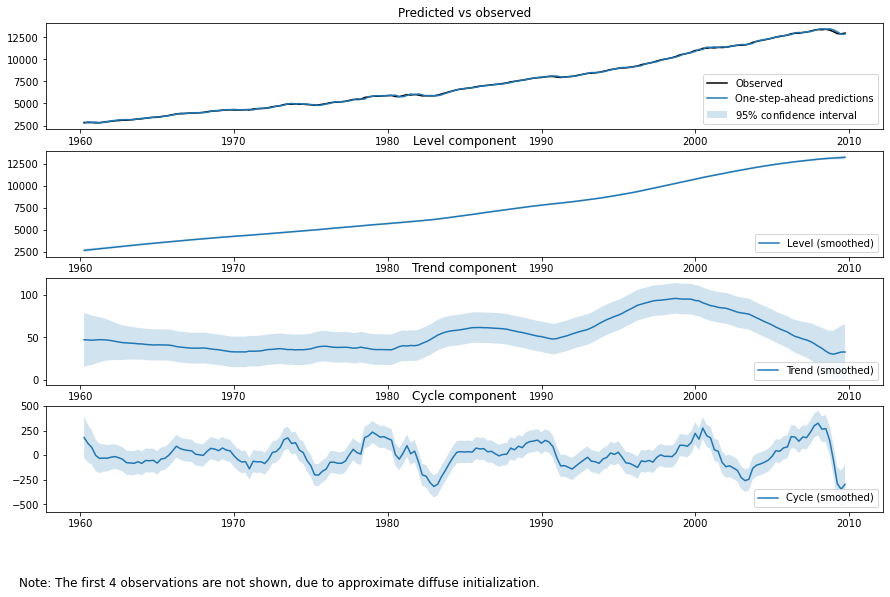

In [230]:
fig = gdp_res.plot_components(legend_loc='lower right', figsize=(15, 9));

In [234]:
gdp_res.forecast(steps = 10)

2009-12-31    13011.538272
2010-03-31    13049.977179
2010-06-30    13103.721786
2010-09-30    13170.218264
2010-12-31    13246.487489
2011-03-31    13329.321604
2011-06-30    13415.473879
2011-09-30    13501.832544
2011-12-31    13585.571010
2012-03-31    13664.268863
Freq: Q-DEC, dtype: float64